In [1]:
#!pip install seaborn
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sym.init_printing()
%matplotlib inline

# Respuesta dinámica

Ya se ha establecido que el primer paso para analizar un sistema es obtener un modelo.

En el área de la **ingeniería de control**, se configura una base de comparación del comportamiento de sistemas controlados contra señales de prueba particulares.

## Señales de prueba

Las señales de prueba más comunes corresponden a funciones impulso, escalón, rampa, parábola, etc.

Como ya se ha estudiado, la respuesta ante la señal impulso permite caracterizar completamente al sistema, sin embargo, no es posible obtener esta señal en laboratorio.

La señal de prueba más apropiada para un sistema debe determinarse por la forma más frecuente de las excitaciones en su operación normal.

### Impulso
Entendido como la derivada del escalón.
\begin{equation}
    \delta(t) = \frac{d\epsilon}{dt}    
\end{equation}

Aplicando la transformada de Laplace se obtiene:
\begin{equation}
    \mathcal{L} \{ \delta(t) \} = 1    
\end{equation}

Determina completamente el comportamiento del sistema.

### Escalón
\begin{equation}
\epsilon(t) = \begin{cases} 0 & t<0 \\  1 & t > 0 \end{cases}
\end{equation}

Aplicando la transformada de Laplace se obtiene:
\begin{equation}
    \mathcal{L} \{ \epsilon(t) \} = \frac{1}{s}  
\end{equation}

Apropiada para visualizar el comportamiento de sistemas que buscan mantener variables fijas.

### Rampa
Entendida como la integral del escalón.

\begin{equation}
    rampa(t) = \int_{-\infty}^{t} \epsilon(\tau) d\tau = t \cdot \epsilon(t) 
\end{equation}

Aplicando la transformada de Laplace se obtiene:
\begin{equation}
    \mathcal{L} \{ rampa(t) \} = \frac{1}{s^2}
\end{equation}

Apropiada para visualizar el comportamiento de sistemas que buscan variables que cambian con velocidad constante.

### Parábola
Entendida como la integral de la rampa.

\begin{equation}
    parabola(t) = \int_{-\infty}^{t} rampa(\tau) d\tau   = \frac{t^2}{2} \cdot \epsilon(t)  
\end{equation}

Aplicando la transformada de Laplace se obtiene:
\begin{equation}
    \mathcal{L} \{ parabola(t) \} = \frac{1}{s^3}  
\end{equation}

Apropiada para visualizar el comportamiento de sistemas que buscan variables que cambian con aceleración constante.


## Respuesta transitoria y respuesta estacionaria

Cuando un [sistema estable](https://en.wikipedia.org/wiki/BIBO_stability) es excitado en el instante $t=0$, este responde de manera continua (respuesta transitoria) desde un estado inicial relacionado con las condiciones iniciales hasta que logra equilibrio (respuesta estacionaria).


![RespuestaDinamica](figuras/RespuestaDinamica.png)

## Sistemas de primer orden

Considere la siguiente función de transferencia:

![bloque](figuras/bloque_frecuencia.PNG)

\begin{equation}
G(s) = \frac{C(s)}{R(s)} = \frac{a}{b s + c}
\end{equation}

Este sistema tiene $3$ parámetros ($a$, $b$ y $c$), sin embargo, para facilitar el análisis de estos sistemas puede transformarse la función a su forma canónica al dividir numerador y denominador por $c$.

\begin{equation}
G(s) = \frac{C(s)}{R(s)}  = \frac{\frac{a}{c}}{\frac{b}{c} s + \frac{c}{c}}= \frac{k}{\tau s + 1}
\end{equation}


### Respesta al escalón

Si el sistema es excitado con un escalón unitario, la señal de salida en el dominio de la frecuencia es:

\begin{equation}
C(s) = G(s) \cdot R(s) = \frac{k}{\tau s + 1} \cdot \frac{1}{s}
\end{equation}

Observe que esta expresión puede reescrbirse como:

\begin{equation}
C(s)= k \cdot \left ( \frac{1}{s} - \frac{\tau}{\tau s + 1} \right )
\end{equation}

La transformada inversa de Laplace permite obtener una expresión para la señal de salida en el dominio del tiempo $c(t)$.

\begin{equation}
c(t)= k \left ( 1 - e^{-t/\tau} \right ) \epsilon(t)
\end{equation}

Observe que:

- $c(t<0)=0$ (condción inicial).
- $\lim_{t\rightarrow \infty} c(t)=k$ (respuesta estacionaria).
- La respuesta transitoria es dominada por $e^{-t/\tau}$.
- $c(\tau) = 0.632k$, el sistema alcanza el $63.2\%$ del valor final después de un tiempo $\tau$.
- $c(2\tau) = 0.865k$, el sistema alcanza el $86.5\%$ del valor final después de un tiempo $2\tau$.
- $c(3\tau) = 0.95k$, el sistema alcanza el $95\%$ del valor final después de un tiempo $3\tau$.
- $\frac{dc}{dt}\big\vert_{t = 0^+} = \frac{d}{dt} \left ( k \left ( 1 - e^{-t/\tau} \right ) \right ) \big\vert_{t = 0^+} = \frac{k}{\tau}  e^{-t/\tau} \big\vert_{t = 0^+} =\frac{k}{\tau}$
- El sistema tiene un polo ubicado en $s=\frac{-1}{\tau}$


In [2]:
k, tau = sym.symbols('k, tau',real=True, positive=True)
t = sym.symbols('t',real=True, positive=True)

s = sym.Symbol('s')

def L(f):
    return sym.laplace_transform(f, t, s, noconds=True)
def invL(F):
    return sym.inverse_laplace_transform(F, s, t)

In [3]:
# la entrada r(t) es escalon unitario
r = sym.Heaviside(t)
r

In [4]:
# la entrada R(s) es la transformada de Laplace de r(t)
R = L(r)
R

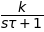

In [5]:
# Se define la función de transferencia del sistema G(s)
G = k/(tau*s + 1)
g =invL(G)
G

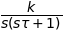

In [6]:
# la salida se calcula como C(s) = G(s)R(s)
C = G*R
C

In [7]:
# la salida c(t) es la transformada inversa de Laplace de C(s)
c = invL(C)
c

Hasta este punto se ha encontrado la respuesta general de un sistema de primer orden ante una entrada escalón. Se recomienda variar los parámetros del sistema para identificar cómo varía su comportamiento.

In [8]:
# Para valores particulares de k y tau
K = 0.8
T = 2
kt = {k: K, tau: T}
ckt = c.subs(kt)
ckt

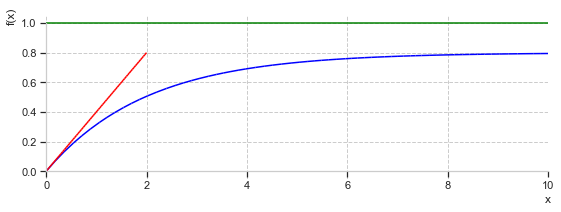

In [9]:
plt.rcParams['figure.figsize'] = 9, 3
g0 = sym.plot(r,(t,0,10),show = False, line_color='green');
g1 = sym.plot(ckt, (t,0,10),show = False, line_color='blue')
g2 = sym.plot(t*K/T,(t,0,T),show = False, line_color='red');
g0.extend(g1)
g0.extend(g2)
g0.show()
kt

### Respesta ante la rampa

Si el sistema es excitado con una rampa unitaria, la señal de salida en el dominio de la frecuencia es:

\begin{equation}
C(s) = G(s) \cdot R(s) = \frac{k}{\tau s + 1} \cdot \frac{1}{s^2}
\end{equation}

Observe que esta expresión puede reescrbirse como:

\begin{equation}
C(s)= k \cdot \left ( \frac{1}{s^2} - \frac{\tau}{s} + \frac{\tau^2}{\tau s + 1} \right )
\end{equation}

La transformada inversa de Laplace permite obtener una expresión para la señal de salida en el dominio del tiempo $c(t)$.

\begin{equation}
c(t)= k \left ( t - \tau + \tau e^{-t/\tau} \right ) \epsilon(t)
\end{equation}

Observe que:

- $c(t)$ se compone de una rampa ($t$), una constante ($\tau$) y una exponencial ($\tau e^{-t/\tau}$).
- $c(t<0)=0$ (condción inicial).
- A medida que $t\rightarrow \infty$, $\tau e^{-t/\tau} \rightarrow 0$, por lo que $\lim_{t\rightarrow \infty} c(t)=k \left ( t - \tau \right )$, es decir hace un seguimiento de la rampa con una desviación que depende de $k$ y $\tau$.

- $\lim_{t\rightarrow \infty} \frac{dc}{dt} = \lim_{t\rightarrow \infty} k \left (1 - e^{-t/\tau} \right ) = k$



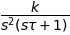

In [15]:
# la salida se calcula como C(s) = G(s)R(s)
C_ramp = G*(1/s**2)
C_ramp

In [16]:
# la salida c_ramp(t) es la transformada inversa de Laplace de C(s)
c_ramp = invL(C_ramp)
c_ramp

In [39]:
# Para valores particulares de k y tau
K = 1.3
T = 2
kt = {k: K, tau: T}
c_rampkt = c_ramp.subs(kt)
c_rampkt

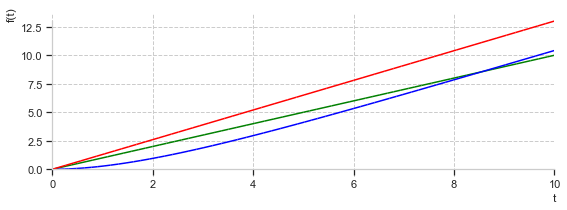

In [40]:
plt.rcParams['figure.figsize'] = 9, 3
g0 = sym.plot(t,(t,0,10),show = False, line_color='green');
g1 = sym.plot(c_rampkt, (t,0,10),show = False, line_color='blue')
g2 = sym.plot(t*K,(t,0,10),show = False, line_color='red');
g0.extend(g1)
g0.extend(g2)
g0.show()
kt

In [44]:
from ipywidgets import interact

evalfimpulse = sym.lambdify((k, tau, t), g , 'numpy')
evalfstep = sym.lambdify((k, tau, t), c, 'numpy')
evalframp = sym.lambdify((k, tau, t), c_ramp, 'numpy')

ts = np.linspace(0, 10)
def orden1(tau_in, K_in):
    plt.figure(figsize=(7, 5))
    ax_impulse = plt.subplot2grid((3, 2), (0, 0))
    ax_step = plt.subplot2grid((3, 2), (1, 0))
    ax_ramp = plt.subplot2grid((3, 2), (2, 0))
    ax_complex = plt.subplot2grid((2, 2), (0, 1), rowspan=2)
    
    
    ax_impulse.plot(ts, evalfimpulse(K_in, tau_in, ts))
    ax_impulse.set_title('Resp. al impulso')
    ax_impulse.set_ylim(0, 10)
    
    tau_height = 1 - np.exp(-1)
    ax_step.set_title('Resp. al escalón')
    ax_step.plot(ts, evalfstep(K_in, tau_in, ts),ts,K_in*ts**0)
    ax_step.set_ylim(0, 10)
    
    ax_ramp.set_title('Resp. a la rampa')
    ax_ramp.plot(ts, evalframp(K_in, tau_in, ts),ts,K_in*ts)
    ax_ramp.set_ylim(0, 100)

    
    ax_complex.set_title('Polos y ceros')
    ax_complex.scatter(-1/tau_in, 0, marker='x', s=30)
    ax_complex.axhline(0, color='black')
    ax_complex.axvline(0, color='black')
    ax_complex.axis([-10, 10, -10, 10])
    
interact(orden1, tau_in=(0.1, 5), K_in=(0.1, 10.));

interactive(children=(FloatSlider(value=2.5500000000000003, description='tau_in', max=5.0, min=0.1), FloatSlid…

Una vez analizadas las simulaciones anteriores, comparta sus ideas para obtener modelos de primer orden de forma experimental.